In [55]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/Final Project - Lan/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Final Project - Lan


In [56]:
#Eymon Lan 661681496
#Final Project

import pandas as pd
import numpy as np
# Read the CSV file
df = pd.read_csv('Data.csv')

# Print the data
print(df.shape)

data = df.values
print(data.shape)

(284, 50)
(284, 50)


In [ ]:
# filter out the rows and only keep final time step
rows_to_keep = np.where(data[:,0] == 7200)[0]
data1 = data[rows_to_keep, :]
print(data1.shape)

(100, 50)


In [ ]:
# define input
y = np.linspace(1, 10, 100)
print(y.shape)
y=y.reshape((y.shape[0],1))
#print(len(x))
print(y.shape)
#print(y)

(100,)
(100, 1)


In [ ]:
# Post processing data
Tvap = data1[:, 1:17:2]
Qtie = data1[:, 18:34:2]
Area = data1[:, 35:52:2]
Qflux = Qtie/Area
#X = np.concatenate((Tvap,Qflux),axis=1)
X = Qflux
print(Tvap.shape)
print(Qtie.shape)
print(X.shape)
print(X[99])
#print(X)

(100, 8)
(100, 8)
(100, 8)
[3.29769497 5.85123313 7.3871163  7.99548958 8.30885681 5.79260658
 3.38587989 1.46014067]


In [ ]:
import pandas as pd
Data_PP = np.concatenate((y,X),axis=1)
print(Data_PP.shape)

df = pd.DataFrame(Data_PP)

# write the DataFrame to a new Excel file in your Google Drive
with pd.ExcelWriter('/content/drive/My Drive/Colab Notebooks/Final Project - Lan/new_excel_file.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=False)

(100, 9)


In [ ]:
# ANN Model to predict heat flux
import tensorflow as tf
from sklearn.model_selection import train_test_split
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 8)
(30, 8)
(70, 1)
(30, 1)


In [ ]:
print(X_train.shape)
print(X_train[0])
print(y_train[0])

(70, 8)
[0.77885025 1.37862467 1.74741693 1.84764319 1.91238778 1.23158168
 0.71852295 0.37403531]
[2.]


In [ ]:
print(X.shape)
print(y.shape)

#print(X)



(100, 8)
(100, 1)


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Define your optimizer with a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=2000, batch_size=15)

Epoch 1/2000
7/7 [==============================] - 1s 5ms/step - loss: -10.8161 - accuracy: 0.0100
Epoch 2/2000
7/7 [==============================] - 0s 4ms/step - loss: -10.8185 - accuracy: 0.0100
Epoch 3/2000
7/7 [==============================] - 0s 5ms/step - loss: -10.8212 - accuracy: 0.0100
Epoch 4/2000
7/7 [==============================] - 0s 5ms/step - loss: -10.8236 - accuracy: 0.0100
Epoch 5/2000
7/7 [==============================] - 0s 6ms/step - loss: -10.8262 - accuracy: 0.0100
Epoch 6/2000
7/7 [==============================] - 0s 5ms/step - loss: -10.8286 - accuracy: 0.0100
Epoch 7/2000
7/7 [==============================] - 0s 4ms/step - loss: -10.8313 - accuracy: 0.0100
Epoch 8/2000
7/7 [==============================] - 0s 4ms/step - loss: -10.8338 - accuracy: 0.0100
Epoch 9/2000
7/7 [==============================] - 0s 4ms/step - loss: -10.8364 - accuracy: 0.0100
Epoch 10/2000
7/7 [==============================] - 0s 4ms/step - loss: -10.8389 - accuracy: 0.0100

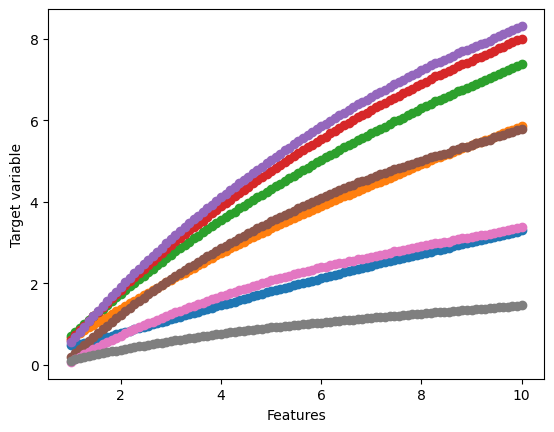

In [ ]:
import matplotlib.pyplot as plt

for i in range(X.shape[1]):
  plt.scatter(y,X[:,i])

plt.xlabel('Features')
plt.ylabel('Target variable')
plt.show()